In [1]:
from sklearn import tree
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG 
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
import math as m
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import glob,os

# Step 1. Connect to all given databases and download all data. Think on automating this process

# Analyzing data from neo4j

In [18]:
#nodes don't seem to be useful for further use
neo4j_nodes = pd.read_csv("neo4j_nodes.csv")
neo4j_nodes

,n
0,"{""LEGAL_ENTITY_ID"":100300315,""CLIENT_NAME"":МГТУ ДВКТ}"
1,"{""SALARY_PROJECT_ID"":12388933}"
2,"{""SALARY_PROJECT_ID"":123834355}"
3,"{""TURN_MONTH_AMT"":192394,""CARD_ID"":5478223498731265,""SALARY_MONTH_INCOME"":145000}"
4,"{""TURN_MONTH_AMT"":75324,""CARD_ID"":4555300019552003,""SALARY_MONTH_INCOME"":45000}"
5,"{""TURN_MONTH_AMT"":1750,""CARD_ID"":4578430918943344,""SALARY_MONTH_INCOME"":1750}"
6,"{""TURN_MONTH_AMT"":35986,""CARD_ID"":2093435614431892,""SALARY_MONTH_INCOME"":2500}"
7,"{""CLIENT_ID"":100200301,""CLIENT_FIO"":Алексеев Борис Петрович}"
8,"{""CLIENT_ID"":100200303,""CLIENT_FIO"":Макарова Елизавета Сергеевна}"
9,"{""CLIENT_ID"":100200311,""CLIENT_FIO"":Лебедев Марк Генадьевич}"


In [19]:
#nodes and relationships are interesting
neo4j_relations = pd.read_csv("neo4j_relations.csv")
neo4j_relations = neo4j_relations.drop(columns={"r"})

In [20]:
neo4j_relations = neo4j_relations.replace({'{':"","}":""}, regex=True)
neo4j_relations = neo4j_relations.replace({'"':''}, regex=True)
neo4j_relations

,n,m
0,"TURN_MONTH_AMT:75324,CARD_ID:4555300019552003,SALARY_MONTH_INCOME:45000",SALARY_PROJECT_ID:12388933
1,"TURN_MONTH_AMT:192394,CARD_ID:5478223498731265,SALARY_MONTH_INCOME:145000",SALARY_PROJECT_ID:12388933
2,"LEGAL_ENTITY_ID:100300315,CLIENT_NAME:МГТУ ДВКТ",SALARY_PROJECT_ID:12388933
3,"TURN_MONTH_AMT:35986,CARD_ID:2093435614431892,SALARY_MONTH_INCOME:2500",SALARY_PROJECT_ID:123834355
4,"TURN_MONTH_AMT:1750,CARD_ID:4578430918943344,SALARY_MONTH_INCOME:1750",SALARY_PROJECT_ID:123834355
5,"LEGAL_ENTITY_ID:100300315,CLIENT_NAME:МГТУ ДВКТ",SALARY_PROJECT_ID:123834355
6,"CLIENT_ID:100200301,CLIENT_FIO:Алексеев Борис Петрович","TURN_MONTH_AMT:192394,CARD_ID:5478223498731265,SALARY_MONTH_INCOME:145000"
7,"CLIENT_ID:100200303,CLIENT_FIO:Макарова Елизавета Сергеевна","TURN_MONTH_AMT:75324,CARD_ID:4555300019552003,SALARY_MONTH_INCOME:45000"
8,"CLIENT_ID:100200303,CLIENT_FIO:Макарова Елизавета Сергеевна","TURN_MONTH_AMT:1750,CARD_ID:4578430918943344,SALARY_MONTH_INCOME:1750"
9,"CLIENT_ID:100200311,CLIENT_FIO:Лебедев Марк Генадьевич","TURN_MONTH_AMT:35986,CARD_ID:2093435614431892,SALARY_MONTH_INCOME:2500"


Choosing which info is important...

In [21]:
neo4j_relations.drop(index=[14,15,16,17,18,19,20,21,22,23,24,25,26], inplace = True)
neo4j_relations

,n,m
0,"TURN_MONTH_AMT:75324,CARD_ID:4555300019552003,SALARY_MONTH_INCOME:45000",SALARY_PROJECT_ID:12388933
1,"TURN_MONTH_AMT:192394,CARD_ID:5478223498731265,SALARY_MONTH_INCOME:145000",SALARY_PROJECT_ID:12388933
2,"LEGAL_ENTITY_ID:100300315,CLIENT_NAME:МГТУ ДВКТ",SALARY_PROJECT_ID:12388933
3,"TURN_MONTH_AMT:35986,CARD_ID:2093435614431892,SALARY_MONTH_INCOME:2500",SALARY_PROJECT_ID:123834355
4,"TURN_MONTH_AMT:1750,CARD_ID:4578430918943344,SALARY_MONTH_INCOME:1750",SALARY_PROJECT_ID:123834355
5,"LEGAL_ENTITY_ID:100300315,CLIENT_NAME:МГТУ ДВКТ",SALARY_PROJECT_ID:123834355
6,"CLIENT_ID:100200301,CLIENT_FIO:Алексеев Борис Петрович","TURN_MONTH_AMT:192394,CARD_ID:5478223498731265,SALARY_MONTH_INCOME:145000"
7,"CLIENT_ID:100200303,CLIENT_FIO:Макарова Елизавета Сергеевна","TURN_MONTH_AMT:75324,CARD_ID:4555300019552003,SALARY_MONTH_INCOME:45000"
8,"CLIENT_ID:100200303,CLIENT_FIO:Макарова Елизавета Сергеевна","TURN_MONTH_AMT:1750,CARD_ID:4578430918943344,SALARY_MONTH_INCOME:1750"
9,"CLIENT_ID:100200311,CLIENT_FIO:Лебедев Марк Генадьевич","TURN_MONTH_AMT:35986,CARD_ID:2093435614431892,SALARY_MONTH_INCOME:2500"


In [70]:
client_salary = neo4j_relations.iloc[6:10]
client_salary

,n,m
6,"CLIENT_ID:100200301,CLIENT_FIO:Алексеев Борис Петрович","TURN_MONTH_AMT:192394,CARD_ID:5478223498731265,SALARY_MONTH_INCOME:145000"
7,"CLIENT_ID:100200303,CLIENT_FIO:Макарова Елизавета Сергеевна","TURN_MONTH_AMT:75324,CARD_ID:4555300019552003,SALARY_MONTH_INCOME:45000"
8,"CLIENT_ID:100200303,CLIENT_FIO:Макарова Елизавета Сергеевна","TURN_MONTH_AMT:1750,CARD_ID:4578430918943344,SALARY_MONTH_INCOME:1750"
9,"CLIENT_ID:100200311,CLIENT_FIO:Лебедев Марк Генадьевич","TURN_MONTH_AMT:35986,CARD_ID:2093435614431892,SALARY_MONTH_INCOME:2500"


In [73]:
names = client_salary['n'].str.split(",", expand=True)
money = client_salary['m'].str.split(",", expand=True)
client_salary = pd.concat([names,money], axis=1, ignore_index=True)
client_salary.reset_index(drop=True, inplace=True)
client_salary = client_salary.drop(columns={1,3})
client_salary = client_salary.rename(columns={client_salary.columns[0]:"CLIENT_ID",
                                              client_salary.columns[1]:"TURN_MONTH_AMT",
                                              4:"SALARY_MONTH_INCOME"})
client_salary = client_salary.replace({'CLIENT_ID:':'',"TURN_MONTH_AMT:":"","SALARY_MONTH_INCOME:":""}, regex=True)
client_salary

,CLIENT_ID,TURN_MONTH_AMT,SALARY_MONTH_INCOME
0,100200301,192394,145000
1,100200303,75324,45000
2,100200303,1750,1750
3,100200311,35986,2500


In [100]:
client_salary["CLIENT_ID"] = client_salary ["CLIENT_ID"].astype(object).astype(int)
client_salary["TURN_MONTH_AMT"] = client_salary ["TURN_MONTH_AMT"].astype(object).astype(int)
client_salary["SALARY_MONTH_INCOME"] = client_salary ["SALARY_MONTH_INCOME"].astype(object).astype(int)
client_salary.dtypes

CLIENT_ID              int64
TURN_MONTH_AMT         int64
SALARY_MONTH_INCOME    int64
dtype: object

In [107]:
client_salary.at[1,"TURN_MONTH_AMT"] = client_salary.at[1,"TURN_MONTH_AMT"] + client_salary.at[2,"TURN_MONTH_AMT"]
client_salary

In [109]:
client_salary.at[1,"SALARY_MONTH_INCOME"] = client_salary.at[1,"SALARY_MONTH_INCOME"] + client_salary.at[2,"SALARY_MONTH_INCOME"]
client_salary

,CLIENT_ID,TURN_MONTH_AMT,SALARY_MONTH_INCOME
0,100200301,192394,145000
1,100200303,77074,46750
2,100200303,1750,1750
3,100200311,35986,2500


In [112]:
#client_salary = client_salary.drop([2])
client_salary.reset_index(drop=True)

,CLIENT_ID,TURN_MONTH_AMT,SALARY_MONTH_INCOME
0,100200301,192394,145000
1,100200303,77074,46750
2,100200311,35986,2500


In [117]:
client_salary

,CLIENT_ID,TURN_MONTH_AMT,SALARY_MONTH_INCOME
0,100200301,192394,145000
1,100200303,77074,46750
3,100200311,35986,2500


# Analyzing data from postgresql

In [81]:
pg_clients = pd.read_csv("postgres_loans_clients.csv",header=None, names=["CLIENT_ID","FIO","BIRTH_DT","INN",
                                                                        "CITIZENSHIP"])
#column names were givan in a separate file
pg_clients

,CLIENT_ID,FIO,BIRTH_DT,INN,CITIZENSHIP
0,100200300,Лопатин Иван Иванович,1982-03-02,589463240112,РФ
1,100200302,Захарова Людмила Айдаровна,1966-09-04,554567899997,Республика Беларусь
2,100200304,Романова Валентина Александровна,1968-10-16,234568923474,РФ
3,100200306,Сорокин Павел Леонидович,1984-10-17,345233350097,РФ
4,100200308,Сабиров Рамиль Маратович,1984-12-19,234525680984,РФ
5,100200310,Николаев Егор Ибрагимович,2000-01-21,398088777766,РФ


In [82]:
#deleted all info not relevant for final table
pg_clients = pg_clients.drop(columns={"FIO","BIRTH_DT","INN"})
pg_clients

,CLIENT_ID,CITIZENSHIP
0,100200300,РФ
1,100200302,Республика Беларусь
2,100200304,РФ
3,100200306,РФ
4,100200308,РФ
5,100200310,РФ


In [79]:
pg_lbalance = pd.read_csv("postgres_loans_loan_balance.csv",header=None,names=["LOAN_ID","LOAN_BALANCE","OD_AMT",
                                                                               "INT_AMT", "OD_OVERBUE_AMT", 
                                                                               "INT_OVERBUE_AMT",
                                                                               "START_DT","END_DT"])
#seems like balance and id were confused, I changed that
pg_lbalance ["LOAN_BALANCE"] = pg_lbalance["LOAN_BALANCE"].astype(float).astype(int)
pg_lbalance

,LOAN_ID,LOAN_BALANCE,OD_AMT,INT_AMT,OD_OVERBUE_AMT,INT_OVERBUE_AMT,START_DT,END_DT
0,15556671000,3945600,267040.0,0.0,0.0,2021-08-20 00:00:00,2021-09-04 00:00:00,NaN
1,15556671000,3942700,261540.0,0.0,0.0,2021-09-05 00:00:00,2999-01-01 00:00:00,NaN
2,15556671001,357800,24780.0,3670.0,550.0,2021-08-20 00:00:00,2999-01-01 00:00:00,NaN
3,15556671002,134500,22760.0,0.0,0.0,2021-08-05 00:00:00,2021-09-09 00:00:00,NaN
4,15556671002,134500,25678.0,0.0,0.0,2021-09-10 00:00:00,2021-09-11 00:00:00,NaN
5,15556671002,128650,20653.0,0.0,0.0,2021-09-12 00:00:00,2999-01-01 00:00:00,NaN
6,15556671003,0,0.0,0.0,0.0,2021-08-05 00:00:00,2999-01-01 00:00:00,NaN
7,15556671004,0,0.0,189034.0,36905.0,2021-07-31 00:00:00,2999-01-01 00:00:00,NaN
8,15556671005,0,0.0,0.0,0.0,2021-06-30 00:00:00,2999-01-01 00:00:00,NaN


In [83]:
pg_lloans = pd.read_csv("postgres_loans_loans.csv",header=None,names=["LOAN_ID","BEGIN_DT", "CLOSE_PLAN_DT",
                                                                       "CLOSE_FACT_DT","CLIENT_ID","REPAYMENT_MODE",
                                                                       "PRODUCT_ID", "INTEREST_RATE"])
pg_lloans

,LOAN_ID,BEGIN_DT,CLOSE_PLAN_DT,CLOSE_FACT_DT,CLIENT_ID,REPAYMENT_MODE,PRODUCT_ID,INTEREST_RATE
0,15556671000,2019-01-20,2029-11-30,NaN,100200300,аннуитет,111117,12.5
1,15556671001,2021-04-05,2023-04-06,NaN,100200302,дисконт,111121,7.8
2,15556671002,2021-08-07,2022-09-08,NaN,100200304,аннуитет,111119,11.3
3,15556671003,2020-10-31,2022-05-01,2021-08-05,100200306,аннуитет,111120,10.0
4,15556671004,2016-04-24,2021-04-25,NaN,100200308,аннуитет,111120,9.4
5,15556671005,2020-12-05,2021-12-06,2021-06-30,100200310,аннуитет,111122,6.9


In [84]:
pg_lloans = pg_lloans.drop(columns={"PRODUCT_ID"})
pg_lloans['BEGIN_DT'] = pd.DatetimeIndex(pg_lloans['BEGIN_DT']).year
pg_lloans["CLOSE_PLAN_DT"]=pd.DatetimeIndex(pg_lloans["CLOSE_PLAN_DT"]).year
pg_lloans["CLOSE_FACT_DT"]=pd.DatetimeIndex(pg_lloans["CLOSE_FACT_DT"]).year
pg_lloans = pg_lloans.fillna(0) #for future ML
pg_lloans.CLOSE_FACT_DT = pg_lloans.CLOSE_FACT_DT.astype(int)
pg_lloans

,LOAN_ID,BEGIN_DT,CLOSE_PLAN_DT,CLOSE_FACT_DT,CLIENT_ID,REPAYMENT_MODE,INTEREST_RATE
0,15556671000,2019,2029,0,100200300,аннуитет,12.5
1,15556671001,2021,2023,0,100200302,дисконт,7.8
2,15556671002,2021,2022,0,100200304,аннуитет,11.3
3,15556671003,2020,2022,2021,100200306,аннуитет,10.0
4,15556671004,2016,2021,0,100200308,аннуитет,9.4
5,15556671005,2020,2021,2021,100200310,аннуитет,6.9


In [192]:
pg_lproducts = pd.read_csv("postgres_loans_products.csv",header=None,names=["PRODUCT_ID","PRODUCT_3_GROUP", 
                                                                            "PRODUCT_2_GROUP", "PRODUCT_1_GROUP"])

pg_lproducts

,PRODUCT_ID,PRODUCT_3_GROUP,PRODUCT_2_GROUP,PRODUCT_1_GROUP
0,111116,"Ипотека ""Хуторок"" на строительство дачи ...","Ипотека ""Хуторок"" ...",Ипотека
1,111117,"Ипотека ""Теремок"" для молодых семей ...","Ипотека ""Теремок"" ...",Ипотека
2,111118,"Ипотека ""Теремок"" совместно с застройщиком ...","Ипотека ""Теремок"" ...",Ипотека
3,111119,"Потребительский кредит ""Электро"" ...","Потребительский кредит ""Электро"" ...",Потребительский
4,111120,Потребительский кредит без обеспечения ...,Потребительский кредит без обеспечения ...,Потребительский
5,111121,"Автокредит ""Рули!"" под авто отечественного про...","Автокредит ""Рули!"" ...",Автокредит
6,111122,"Автокредит ""Рули!"" под спортивное авто ...","Автокредит ""Рули!"" ...",Автокредит


# Application form data processing

In [118]:
pg_apps = pd.read_csv("postgres_prod_apps.csv")
pg_apps.head()

,10010010011,2021-09-01 00:00:00,100500.00,5,Выдача средств,35000.00,75000.00,Лопатин Иван Иванович,100200300,1982-03-02,589463240112,f,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,2021-09-01 16:11:00,Unnamed: 18,Онлайн-приложение
0,10010010012,2021-09-20 00:00:00,200000.0,12,Кредит на обучение,NaN,NaN,Алексеев Борис Петрович,100200301,1984-01-12,345345697678,t,Тишова Юлия Владимировна,+7 (924)3452356,1984-03-02,NaN,NaN,2021-09-21 10:23:00,NaN,Онлайн-приложение
1,10010010013,2021-09-13 00:00:00,55000.0,6,Выдача средств,NaN,NaN,Захарова Людмила Айдаровна,100200302,1966-09-04,554567899997,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10010010014,2021-09-17 00:00:00,15040000.0,25,Городская недвижимость,435000.0,NaN,Макарова Елизавета Сергеевна,100200303,2001-03-11,348791847556,t,Федорова Александра Федеровна,+7 916 885 43 23,1999-07-04,21509000.0,Квартира 3 кмнт,2021-09-17 17:49:59,Инсайдер,Офис
3,10010010015,2021-09-15 00:00:00,654600.0,15,Оборудование,NaN,NaN,Романова Валентина Александровна,100200304,1968-10-16,234568923474,t,Соловьев Савелий Ильич,89256584498,1983-08-13,150000.0,Типографский станок,2021-09-16 09:43:02,NaN,NaN
4,10010010016,2021-09-17 00:00:00,2267000.0,20,Авто,120.0,157.0,Нургалиев Алим Мухамбетович,100200305,1990-04-07,112435322234,t,Макаров Эдуард Васильевич,NaN,1984-02-26,3200000.0,Дача,2021-09-17 12:05:20,NaN,Сайт


In [120]:
pg_apps = pd.read_csv("postgres_prod_apps.csv",header=None,names=["APP_ID","APP_DATE","CRED_AMOUNT","CRED_TERM",
                                                                  "CRED_OBJECT","CUST_MONTH_INCOME",
                                                                  "CUST_FAMILY_MONTH_INCOME",
                                                                  "CUST_FIO","CUST_ID","CUST_BIRTH","CUST_INN",
                                                                  "GUARANTOR_FLAG",
                                                                  "GUARANTOR_FIO","GUARANTOR_PHONE","GUARANTOR_BIRTH",
                                                                  "PLEDGE_AMOUNT","PLEDGE_TYPE","INTERVIEW_DATETIME",
                                                                  "CUST_RELATION_BANK_TYPE","APP_SALE_CHANNEL"])
pg_apps

,APP_ID,APP_DATE,CRED_AMOUNT,CRED_TERM,CRED_OBJECT,CUST_MONTH_INCOME,CUST_FAMILY_MONTH_INCOME,CUST_FIO,CUST_ID,CUST_BIRTH,CUST_INN,GUARANTOR_FLAG,GUARANTOR_FIO,GUARANTOR_PHONE,GUARANTOR_BIRTH,PLEDGE_AMOUNT,PLEDGE_TYPE,INTERVIEW_DATETIME,CUST_RELATION_BANK_TYPE,APP_SALE_CHANNEL
0,10010010011,2021-09-01 00:00:00,100500.0,5,Выдача средств,35000.0,75000.0,Лопатин Иван Иванович,100200300,1982-03-02,589463240112,f,NaN,NaN,NaN,NaN,NaN,2021-09-01 16:11:00,NaN,Онлайн-приложение
1,10010010012,2021-09-20 00:00:00,200000.0,12,Кредит на обучение,NaN,NaN,Алексеев Борис Петрович,100200301,1984-01-12,345345697678,t,Тишова Юлия Владимировна,+7 (924)3452356,1984-03-02,NaN,NaN,2021-09-21 10:23:00,NaN,Онлайн-приложение
2,10010010013,2021-09-13 00:00:00,55000.0,6,Выдача средств,NaN,NaN,Захарова Людмила Айдаровна,100200302,1966-09-04,554567899997,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10010010014,2021-09-17 00:00:00,15040000.0,25,Городская недвижимость,435000.0,NaN,Макарова Елизавета Сергеевна,100200303,2001-03-11,348791847556,t,Федорова Александра Федеровна,+7 916 885 43 23,1999-07-04,21509000.0,Квартира 3 кмнт,2021-09-17 17:49:59,Инсайдер,Офис
4,10010010015,2021-09-15 00:00:00,654600.0,15,Оборудование,NaN,NaN,Романова Валентина Александровна,100200304,1968-10-16,234568923474,t,Соловьев Савелий Ильич,89256584498,1983-08-13,150000.0,Типографский станок,2021-09-16 09:43:02,NaN,NaN
5,10010010016,2021-09-17 00:00:00,2267000.0,20,Авто,120.0,157.0,Нургалиев Алим Мухамбетович,100200305,1990-04-07,112435322234,t,Макаров Эдуард Васильевич,NaN,1984-02-26,3200000.0,Дача,2021-09-17 12:05:20,NaN,Сайт
6,10010010017,2021-09-20 00:00:00,559000.0,6,Земельный участок,66.0,150.0,Сорокин Павел Леонидович,100200306,1984-10-17,345233350097,f,NaN,NaN,NaN,680000.0,Авто,2021-09-21 13:07:45,NaN,Онлайн-приложение
7,10010010018,2021-09-01 00:00:00,1547000.0,15,Авто,160.0,NaN,Киселев Аффанасий Денисович,100200307,1949-08-09,547688972234,t,Моргунова Ирина Олеговна,+7(935)6122055,1991-02-16,1599000.0,Авто,2021-09-01 10:31:00,NaN,Сайт
8,10010010019,2021-09-16 00:00:00,8838925.0,36,Дача,95.0,143.0,Сабиров Рамиль Маратович,100200308,1984-12-19,234525680984,t,Лопанова Арина Васильевна,8 965 12476 99,1988-12-30,NaN,NaN,2021-09-16 19:01:56,Сотрудник банка,NaN
9,10010010020,2021-09-22 00:00:00,502000.0,20,Выдача средств,NaN,NaN,Медведев Юрий Ефремович,100200309,1988-03-11,234522220978,f,NaN,NaN,NaN,NaN,NaN,2021-09-22 15:14:08,NaN,Офис


In [121]:
pg_apps = pg_apps.fillna(0)
pg_apps = pg_apps.drop(columns={"APP_ID","APP_DATE","CUST_FIO","CUST_INN","GUARANTOR_FIO","GUARANTOR_PHONE",
                                    "PLEDGE_TYPE","INTERVIEW_DATETIME"})
pg_apps['CUST_BIRTH'] = pd.DatetimeIndex(pg_apps['CUST_BIRTH']).year
pg_apps["GUARANTOR_BIRTH"]=pd.DatetimeIndex(pg_apps["GUARANTOR_BIRTH"]).year
pg_apps

,CRED_AMOUNT,CRED_TERM,CRED_OBJECT,CUST_MONTH_INCOME,CUST_FAMILY_MONTH_INCOME,CUST_ID,CUST_BIRTH,GUARANTOR_FLAG,GUARANTOR_BIRTH,PLEDGE_AMOUNT,CUST_RELATION_BANK_TYPE,APP_SALE_CHANNEL
0,100500.0,5,Выдача средств,35000.0,75000.0,100200300,1982,f,1970,0.0,0,Онлайн-приложение
1,200000.0,12,Кредит на обучение,0.0,0.0,100200301,1984,t,1984,0.0,0,Онлайн-приложение
2,55000.0,6,Выдача средств,0.0,0.0,100200302,1966,f,1970,0.0,0,0
3,15040000.0,25,Городская недвижимость,435000.0,0.0,100200303,2001,t,1999,21509000.0,Инсайдер,Офис
4,654600.0,15,Оборудование,0.0,0.0,100200304,1968,t,1983,150000.0,0,0
5,2267000.0,20,Авто,120.0,157.0,100200305,1990,t,1984,3200000.0,0,Сайт
6,559000.0,6,Земельный участок,66.0,150.0,100200306,1984,f,1970,680000.0,0,Онлайн-приложение
7,1547000.0,15,Авто,160.0,0.0,100200307,1949,t,1991,1599000.0,0,Сайт
8,8838925.0,36,Дача,95.0,143.0,100200308,1984,t,1988,0.0,Сотрудник банка,0
9,502000.0,20,Выдача средств,0.0,0.0,100200309,1988,f,1970,0.0,0,Офис


In [80]:
pg_apps.to_csv('app_after_filter.csv', index=True)

In [123]:
pg_apps = pg_apps.rename(columns={"CUST_ID":"CLIENT_ID"})
new_form = pg_apps.merge(pg_clients, on='CLIENT_ID', how='outer') #сначала одну, потом другую, почему-то иначе ошибки
new_form = new_form.fillna(0)
new_form = new_form.merge(pg_lloans, on='CLIENT_ID', how='outer')
new_form

,CRED_AMOUNT,CRED_TERM,CRED_OBJECT,CUST_MONTH_INCOME,CUST_FAMILY_MONTH_INCOME,CLIENT_ID,CUST_BIRTH,GUARANTOR_FLAG,GUARANTOR_BIRTH,PLEDGE_AMOUNT,CUST_RELATION_BANK_TYPE,APP_SALE_CHANNEL,CITIZENSHIP,LOAN_ID,BEGIN_DT,CLOSE_PLAN_DT,CLOSE_FACT_DT,REPAYMENT_MODE,INTEREST_RATE
0,100500.0,5,Выдача средств,35000.0,75000.0,100200300,1982,f,1970,0.0,0,Онлайн-приложение,РФ,1.555667e+10,2019.0,2029.0,0.0,аннуитет,12.5
1,200000.0,12,Кредит на обучение,0.0,0.0,100200301,1984,t,1984,0.0,0,Онлайн-приложение,0,NaN,NaN,NaN,NaN,NaN,NaN
2,55000.0,6,Выдача средств,0.0,0.0,100200302,1966,f,1970,0.0,0,0,Республика Беларусь,1.555667e+10,2021.0,2023.0,0.0,дисконт,7.8
3,15040000.0,25,Городская недвижимость,435000.0,0.0,100200303,2001,t,1999,21509000.0,Инсайдер,Офис,0,NaN,NaN,NaN,NaN,NaN,NaN
4,654600.0,15,Оборудование,0.0,0.0,100200304,1968,t,1983,150000.0,0,0,РФ,1.555667e+10,2021.0,2022.0,0.0,аннуитет,11.3
5,2267000.0,20,Авто,120.0,157.0,100200305,1990,t,1984,3200000.0,0,Сайт,0,NaN,NaN,NaN,NaN,NaN,NaN
6,559000.0,6,Земельный участок,66.0,150.0,100200306,1984,f,1970,680000.0,0,Онлайн-приложение,РФ,1.555667e+10,2020.0,2022.0,2021.0,аннуитет,10.0
7,1547000.0,15,Авто,160.0,0.0,100200307,1949,t,1991,1599000.0,0,Сайт,0,NaN,NaN,NaN,NaN,NaN,NaN
8,8838925.0,36,Дача,95.0,143.0,100200308,1984,t,1988,0.0,Сотрудник банка,0,РФ,1.555667e+10,2016.0,2021.0,0.0,аннуитет,9.4
9,502000.0,20,Выдача средств,0.0,0.0,100200309,1988,f,1970,0.0,0,Офис,0,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# new_form = new_form.merge(client_salary, on='CLIENT_ID', how='outer')
# new_form = new_form.fillna(0)
cols = ['LOAN_ID',"BEGIN_DT","CLOSE_PLAN_DT","CLOSE_FACT_DT"]
new_form[cols] = new_form[cols].applymap(np.int64)
new_form

,CRED_AMOUNT,CRED_TERM,CRED_OBJECT,CUST_MONTH_INCOME,CUST_FAMILY_MONTH_INCOME,CLIENT_ID,CUST_BIRTH,GUARANTOR_FLAG,GUARANTOR_BIRTH,PLEDGE_AMOUNT,CUST_RELATION_BANK_TYPE,APP_SALE_CHANNEL,CITIZENSHIP,LOAN_ID,BEGIN_DT,CLOSE_PLAN_DT,CLOSE_FACT_DT,REPAYMENT_MODE,INTEREST_RATE,TURN_MONTH_AMT,SALARY_MONTH_INCOME
0,100500.0,5,Выдача средств,35000.0,75000.0,100200300,1982,f,1970,0.0,0,Онлайн-приложение,РФ,15556671000,2019,2029,0,аннуитет,12.5,0.0,0.0
1,200000.0,12,Кредит на обучение,0.0,0.0,100200301,1984,t,1984,0.0,0,Онлайн-приложение,0,0,0,0,0,0,0.0,192394.0,145000.0
2,55000.0,6,Выдача средств,0.0,0.0,100200302,1966,f,1970,0.0,0,0,Республика Беларусь,15556671001,2021,2023,0,дисконт,7.8,0.0,0.0
3,15040000.0,25,Городская недвижимость,435000.0,0.0,100200303,2001,t,1999,21509000.0,Инсайдер,Офис,0,0,0,0,0,0,0.0,77074.0,46750.0
4,654600.0,15,Оборудование,0.0,0.0,100200304,1968,t,1983,150000.0,0,0,РФ,15556671002,2021,2022,0,аннуитет,11.3,0.0,0.0
5,2267000.0,20,Авто,120.0,157.0,100200305,1990,t,1984,3200000.0,0,Сайт,0,0,0,0,0,0,0.0,0.0,0.0
6,559000.0,6,Земельный участок,66.0,150.0,100200306,1984,f,1970,680000.0,0,Онлайн-приложение,РФ,15556671003,2020,2022,2021,аннуитет,10.0,0.0,0.0
7,1547000.0,15,Авто,160.0,0.0,100200307,1949,t,1991,1599000.0,0,Сайт,0,0,0,0,0,0,0.0,0.0,0.0
8,8838925.0,36,Дача,95.0,143.0,100200308,1984,t,1988,0.0,Сотрудник банка,0,РФ,15556671004,2016,2021,0,аннуитет,9.4,0.0,0.0
9,502000.0,20,Выдача средств,0.0,0.0,100200309,1988,f,1970,0.0,0,Офис,0,0,0,0,0,0,0.0,0.0,0.0


In [129]:
new_form.to_csv('postgresql_neo4j.csv', index=True)

# MySQL data processing

In [18]:
contract_client = pd.read_csv("ISUTANCE_CONTRACT_X_CLIENT.txt",header=None, sep="\t")
contract_close = pd.read_csv("CONTRACT_CLOSE_DT.txt",header=None, sep="\t")
contract = pd.read_csv("ISUTANCE_CONTRACT.txt",header=None, sep="\t")
insurance_amt = pd.read_csv("CONTRACT_INSURANCE_AMT.txt",header=None, sep="\t")

In [19]:
contract_client = contract_client.rename(columns={0:"INSURANCE_CONTRACT_ID",1:"CLIENT_ID"})
contract_client = contract_client.drop(columns={2})
contract_client

,INSURANCE_CONTRACT_ID,CLIENT_ID
0,800800100,100200300
1,800800101,100200302
2,800800103,100200306
3,800800104,100200304


In [20]:
insurance_amt = insurance_amt.rename(columns={0:"INSURANCE_CONTRACT_ID",1:"CONTRACT_INSURANCE_AMT"})
insurance_amt = insurance_amt.drop(columns={2})
insurance_amt

,INSURANCE_CONTRACT_ID,CONTRACT_INSURANCE_AMT
0,800800100,5800000.0
1,800800101,1050000.0
2,800800103,500000.0
3,800800104,2000000.0


In [21]:
insurance = contract_client.merge(insurance_amt, on='INSURANCE_CONTRACT_ID', how='outer')
insurance

,INSURANCE_CONTRACT_ID,CLIENT_ID,CONTRACT_INSURANCE_AMT
0,800800100,100200300,5800000.0
1,800800101,100200302,1050000.0
2,800800103,100200306,500000.0
3,800800104,100200304,2000000.0


In [22]:
insurance.to_csv('mysql.csv', index=True)

# Data merging 

In [25]:
new_form = pd.read_csv("postgresql_neo4j.csv")

In [37]:
#three_bases = new_form.merge(insurance, on='CLIENT_ID', how='outer')
#three_bases = three_bases.drop(columns={"Unnamed: 0"})
three_bases = three_bases.fillna(0)
three_bases

,CRED_AMOUNT,CRED_TERM,CRED_OBJECT,CUST_MONTH_INCOME,CUST_FAMILY_MONTH_INCOME,CLIENT_ID,CUST_BIRTH,GUARANTOR_FLAG,GUARANTOR_BIRTH,PLEDGE_AMOUNT,CUST_RELATION_BANK_TYPE,APP_SALE_CHANNEL,CITIZENSHIP,LOAN_ID,BEGIN_DT,CLOSE_PLAN_DT,CLOSE_FACT_DT,REPAYMENT_MODE,INTEREST_RATE,TURN_MONTH_AMT,SALARY_MONTH_INCOME,INSURANCE_CONTRACT_ID,CONTRACT_INSURANCE_AMT
0,100500.0,5,Выдача средств,35000.0,75000.0,100200300,1982,f,1970,0.0,0,Онлайн-приложение,РФ,15556671000,2019,2029,0,аннуитет,12.5,0.0,0.0,800800100.0,5800000.0
1,200000.0,12,Кредит на обучение,0.0,0.0,100200301,1984,t,1984,0.0,0,Онлайн-приложение,0,0,0,0,0,0,0.0,192394.0,145000.0,0.0,0.0
2,55000.0,6,Выдача средств,0.0,0.0,100200302,1966,f,1970,0.0,0,0,Республика Беларусь,15556671001,2021,2023,0,дисконт,7.8,0.0,0.0,800800101.0,1050000.0
3,15040000.0,25,Городская недвижимость,435000.0,0.0,100200303,2001,t,1999,21509000.0,Инсайдер,Офис,0,0,0,0,0,0,0.0,77074.0,46750.0,0.0,0.0
4,654600.0,15,Оборудование,0.0,0.0,100200304,1968,t,1983,150000.0,0,0,РФ,15556671002,2021,2022,0,аннуитет,11.3,0.0,0.0,800800104.0,2000000.0
5,2267000.0,20,Авто,120.0,157.0,100200305,1990,t,1984,3200000.0,0,Сайт,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
6,559000.0,6,Земельный участок,66.0,150.0,100200306,1984,f,1970,680000.0,0,Онлайн-приложение,РФ,15556671003,2020,2022,2021,аннуитет,10.0,0.0,0.0,800800103.0,500000.0
7,1547000.0,15,Авто,160.0,0.0,100200307,1949,t,1991,1599000.0,0,Сайт,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
8,8838925.0,36,Дача,95.0,143.0,100200308,1984,t,1988,0.0,Сотрудник банка,0,РФ,15556671004,2016,2021,0,аннуитет,9.4,0.0,0.0,0.0,0.0
9,502000.0,20,Выдача средств,0.0,0.0,100200309,1988,f,1970,0.0,0,Офис,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [40]:
three_bases.shape

(13, 23)

In [42]:
three_bases.to_csv('three_bases.csv', index=True)

In [233]:
new_form.to_csv('new_form.csv', index=True) #тут я просто импортнула таблицу

# ML application (too little data, just a demonstration; no conclusions)

In [2]:
three_bases = pd.read_csv("three_bases.csv")

In [3]:
three_bases = pd.get_dummies(three_bases) #оно само делает цифровой формат
three_bases

,Unnamed: 0,CRED_AMOUNT,CRED_TERM,CUST_MONTH_INCOME,CUST_FAMILY_MONTH_INCOME,CLIENT_ID,CUST_BIRTH,GUARANTOR_BIRTH,PLEDGE_AMOUNT,LOAN_ID,BEGIN_DT,CLOSE_PLAN_DT,CLOSE_FACT_DT,INTEREST_RATE,TURN_MONTH_AMT,SALARY_MONTH_INCOME,INSURANCE_CONTRACT_ID,CONTRACT_INSURANCE_AMT,CRED_OBJECT_Авто,CRED_OBJECT_Бытовая техника,CRED_OBJECT_Выдача средств,CRED_OBJECT_Городская недвижимость,CRED_OBJECT_Дача,CRED_OBJECT_Земельный участок,CRED_OBJECT_Коммерческая недвижимость,CRED_OBJECT_Кредит на обучение,CRED_OBJECT_Оборудование,GUARANTOR_FLAG_f,GUARANTOR_FLAG_t,CUST_RELATION_BANK_TYPE_0,CUST_RELATION_BANK_TYPE_Инсайдер,CUST_RELATION_BANK_TYPE_Сотрудник банка,APP_SALE_CHANNEL_0,APP_SALE_CHANNEL_Онлайн-приложение,APP_SALE_CHANNEL_Офис,APP_SALE_CHANNEL_Сайт,CITIZENSHIP_0,CITIZENSHIP_РФ,CITIZENSHIP_Республика Беларусь,REPAYMENT_MODE_0,REPAYMENT_MODE_аннуитет,REPAYMENT_MODE_дисконт
0,0,100500.0,5,35000.0,75000.0,100200300,1982,1970,0.0,15556671000,2019,2029,0,12.5,0.0,0.0,800800100.0,5800000.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
1,1,200000.0,12,0.0,0.0,100200301,1984,1984,0.0,0,0,0,0,0.0,192394.0,145000.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2,55000.0,6,0.0,0.0,100200302,1966,1970,0.0,15556671001,2021,2023,0,7.8,0.0,0.0,800800101.0,1050000.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1
3,3,15040000.0,25,435000.0,0.0,100200303,2001,1999,21509000.0,0,0,0,0,0.0,77074.0,46750.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
4,4,654600.0,15,0.0,0.0,100200304,1968,1983,150000.0,15556671002,2021,2022,0,11.3,0.0,0.0,800800104.0,2000000.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0
5,5,2267000.0,20,120.0,157.0,100200305,1990,1984,3200000.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
6,6,559000.0,6,66.0,150.0,100200306,1984,1970,680000.0,15556671003,2020,2022,2021,10.0,0.0,0.0,800800103.0,500000.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
7,7,1547000.0,15,160.0,0.0,100200307,1949,1991,1599000.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
8,8,8838925.0,36,95.0,143.0,100200308,1984,1988,0.0,15556671004,2016,2021,0,9.4,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
9,9,502000.0,20,0.0,0.0,100200309,1988,1970,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0


In [10]:
three_bases.dtypes

Unnamed: 0                                                int64
CRED_AMOUNT                                             float64
CRED_TERM                                                 int64
CUST_MONTH_INCOME                                       float64
CUST_FAMILY_MONTH_INCOME                                float64
CLIENT_ID                                                 int64
CUST_BIRTH                                                int64
GUARANTOR_BIRTH                                           int64
PLEDGE_AMOUNT                                           float64
LOAN_ID                                                   int64
BEGIN_DT                                                  int64
CLOSE_PLAN_DT                                             int64
CLOSE_FACT_DT                                             int64
INTEREST_RATE                                           float64
TURN_MONTH_AMT                                          float64
SALARY_MONTH_INCOME                     

In [5]:
#who takes loans for longer term?
X = three_bases.drop(["CRED_TERM"],axis=1)
y = three_bases["CRED_TERM"]

In [6]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=2,min_samples_leaf=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2)

In [7]:
X_train.shape

(8, 41)

In [8]:
X_test.shape

(5, 41)

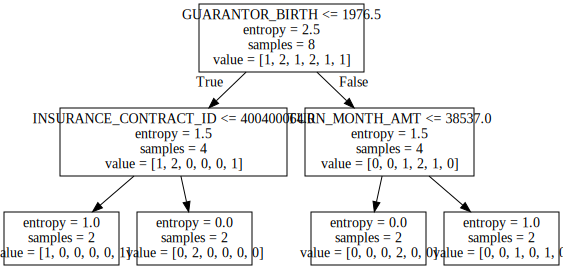

In [9]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X)))
display(SVG(graph.pipe(format='svg')))

[Text(1395.0, 1132.5, 'GUARANTOR_BIRTH <= 1976.5\nentropy = 2.5\nsamples = 8\nvalue = [1, 2, 1, 2, 1, 1]'),
 Text(697.5, 679.5, 'INSURANCE_CONTRACT_ID <= 400400064.0\nentropy = 1.5\nsamples = 4\nvalue = [1, 2, 0, 0, 0, 1]'),
 Text(348.75, 226.5, 'entropy = 1.0\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 1]'),
 Text(1046.25, 226.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(2092.5, 679.5, 'TURN_MONTH_AMT <= 38537.0\nentropy = 1.5\nsamples = 4\nvalue = [0, 0, 1, 2, 1, 0]'),
 Text(1743.75, 226.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(2441.25, 226.5, 'entropy = 1.0\nsamples = 2\nvalue = [0, 0, 1, 0, 1, 0]')]

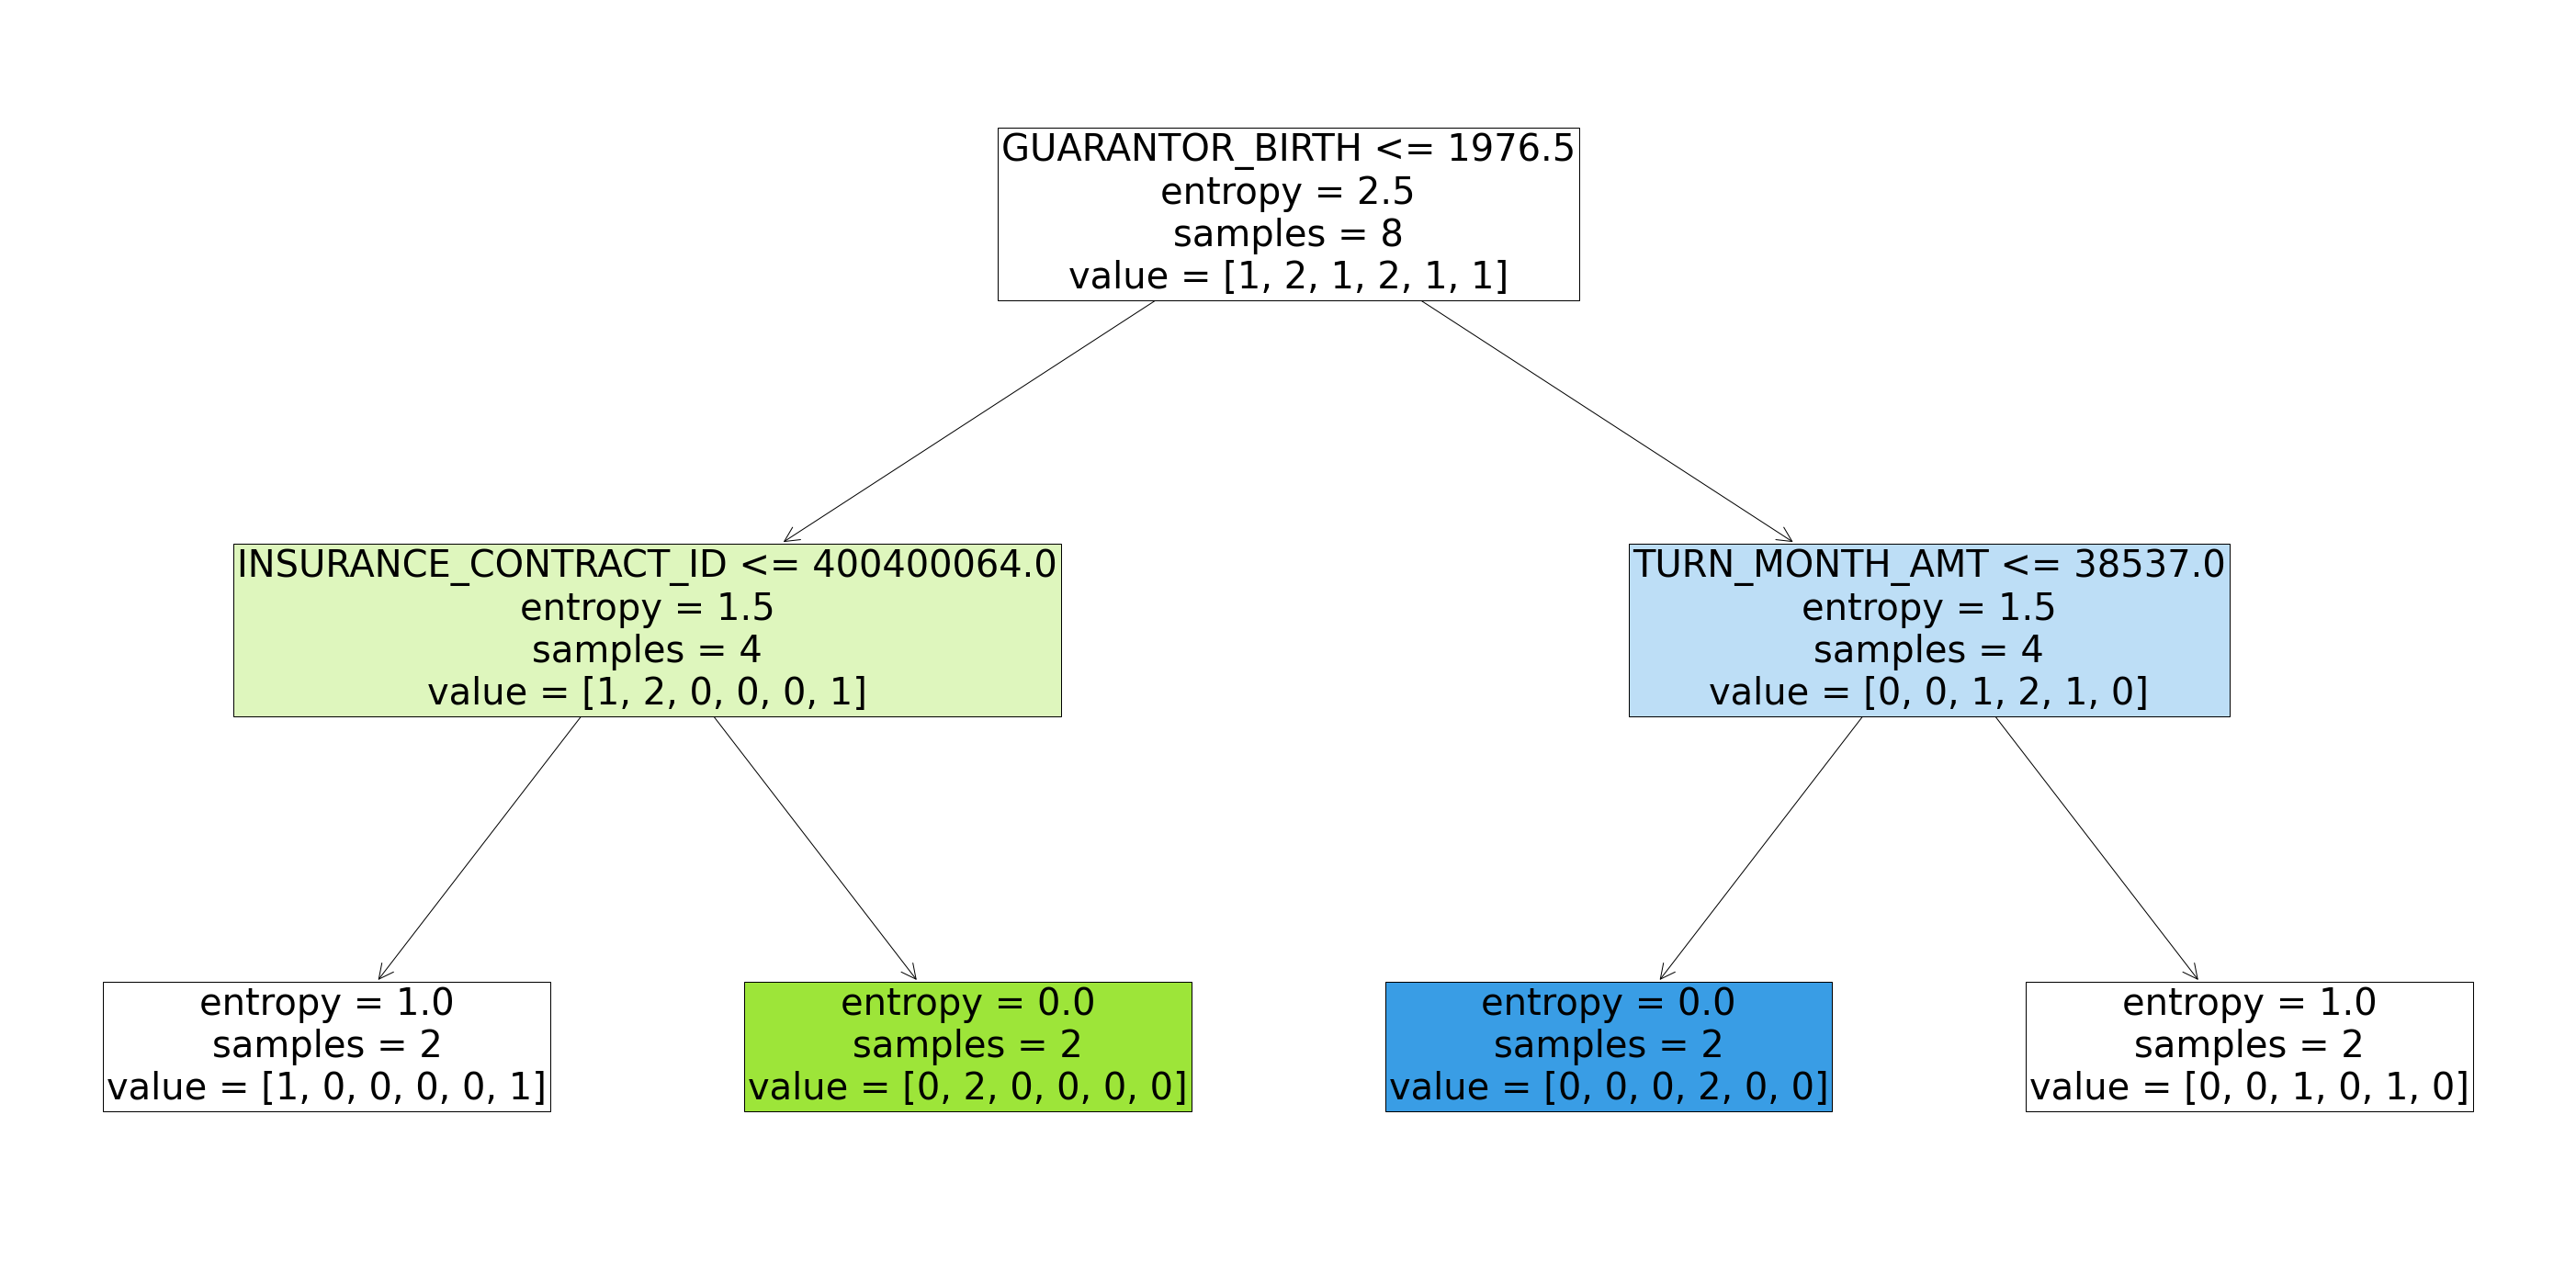

In [11]:
plt.figure(figsize=(50, 25))
tree.plot_tree(clf, fontsize=40, feature_names=list(X), filled=True)